# **EDA**

In [2]:

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file in Google Drive
file_path = '/content/drive/My Drive/data/cleaned_dataset_final.csv'

# Now you can read the file using pandas or any other library
import pandas as pd
data = pd.read_csv(file_path)
# drop phone service and gender as these two columns dont have correlation with target variable
data=data.drop(['PhoneService','gender'],axis=1)
# Display the data
data.head()


Mounted at /content/drive


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Importing libraries

In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import classification_report

In [4]:
# check the type of columns
for col in data.columns:
  print(data[col].dtype)

int64
object
object
int64
object
object
object
object
object
object
object
object
object
object
object
float64
float64
object


In [5]:
# label encoding for binary columns
label_encoder=LabelEncoder()
for col in data.columns:
  if data[col].dtype=="object" and col not in ['InternetService','Contract','PaymentMethod']:
    data[col]=label_encoder.fit_transform(data[col])

In [6]:
print(data.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


In [7]:
# one hot encode for categorical columns
columns_to_onehot_encode=['InternetService','Contract','PaymentMethod']

encoded_data = pd.get_dummies(data[columns_to_onehot_encode], prefix=columns_to_onehot_encode)

# Concatenate the original DataFrame with the one-hot encoded columns
data1 = data.drop(columns_to_onehot_encode, axis=1)

# Drop the original columns that were encoded

data2 = pd.concat([data1, encoded_data], axis=1)


In [8]:
print(data2.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [9]:
# separate features and target variables
x=data2.drop(columns=["Churn"])
y=data2["Churn"]


In [10]:
# separate dataset to train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [11]:
print(x_train.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


# Normalization

In [12]:
# Use standard scaler for numerical columns
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the StandardScaler
scaler = preprocessing.StandardScaler()

# Fit the scaler on the selected columns and transform them

x_train[cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale])
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

# Clustering with kmeans method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

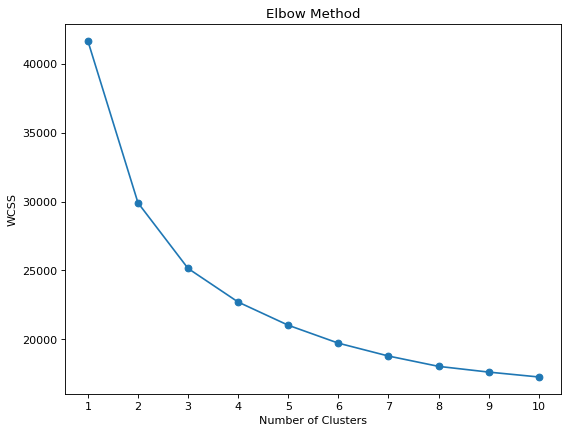

In [13]:

def calculate_wcss(data, max_clusters=10):
    wcss = []
    for n_clusters in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Function to plot the elbow curve
def plot_elbow_curve(wcss, max_clusters=10):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
    plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='-')
    plt.xticks(range(1,max_clusters+1))
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

# Calculate within-cluster sum of squares (WCSS)
wcss_values = calculate_wcss(x_train)

# Plot the elbow curve
plot_elbow_curve(wcss_values)

In [14]:
%pip install kneed
# get suggested number of clusters
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss_values, curve="convex", direction="decreasing")
print(f'number of suggested clusters: {kl.elbow}')

number of suggested clusters: 3


In [15]:
# getting distance matrix
from sklearn.metrics import pairwise_distances
distance_matrix = pairwise_distances(x_train)
print(distance_matrix)

[[0.         4.33434744 3.59283834 ... 3.66898661 3.66985833 3.23175213]
 [4.33434744 0.         5.17880166 ... 5.08947481 3.6012574  4.81753259]
 [3.59283834 5.17880166 0.         ... 1.79567946 3.85759961 3.01666428]
 ...
 [3.66898661 5.08947481 1.79567946 ... 0.         3.99474017 2.70839388]
 [3.66985833 3.6012574  3.85759961 ... 3.99474017 0.         4.41308349]
 [3.23175213 4.81753259 3.01666428 ... 2.70839388 4.41308349 0.        ]]


# Plot numerical features in different clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


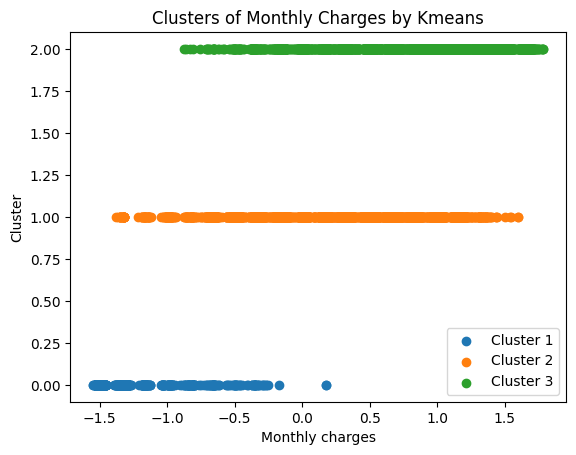

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)
y_kmeans = kmeans.predict(x_train)
feature_data = x_train.iloc[:, 12]

for cluster_label in np.unique(y_kmeans):
    plt.scatter(feature_data[y_kmeans == cluster_label], np.ones_like(feature_data[y_kmeans == cluster_label]) * cluster_label, label=f'Cluster {cluster_label + 1}')

plt.xlabel('Monthly charges')
plt.ylabel('Cluster')
plt.title('Clusters of Monthly Charges by Kmeans')
plt.legend()
plt.show()

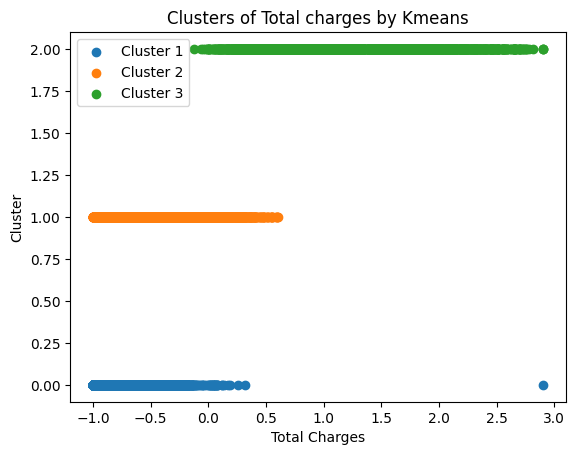

In [17]:
feature_data = x_train.iloc[:, 13]

for cluster_label in np.unique(y_kmeans):
    plt.scatter(feature_data[y_kmeans == cluster_label], np.ones_like(feature_data[y_kmeans == cluster_label]) * cluster_label, label=f'Cluster {cluster_label + 1}')

plt.xlabel('Total Charges')
plt.ylabel('Cluster')
plt.title('Clusters of Total charges by Kmeans')
plt.legend()
plt.show()

# Clustering using DBSCAN method

In [48]:
# clustering with DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.8, min_samples=13)
dbscan.fit(x_train)

# Get cluster labels
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Number of noise points
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 2
Estimated number of noise points: 238


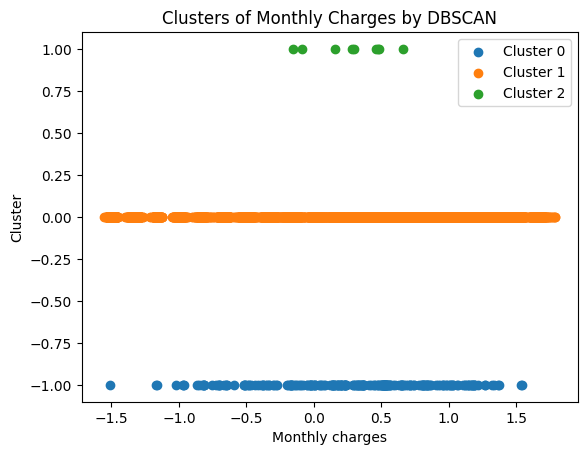

In [49]:
# plot monthly charges based on clusters of DBSCAN
dbscan = DBSCAN(eps=1.8, min_samples=13)
dbscan.fit(x_train)
y_dbscan = dbscan.labels_
feature_data = x_train.iloc[:, 12]

for cluster_label in np.unique(y_dbscan):
    plt.scatter(feature_data[y_dbscan == cluster_label], np.ones_like(feature_data[y_dbscan == cluster_label]) * cluster_label, label=f'Cluster {cluster_label + 1}')

plt.xlabel('Monthly charges')
plt.ylabel('Cluster')
plt.title('Clusters of Monthly Charges by DBSCAN')
plt.legend()
plt.show()

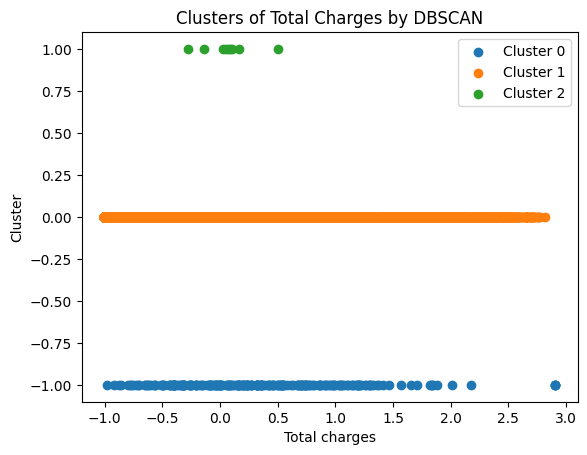

In [20]:
# plot total charges based on clusters of DBSCAN
dbscan = DBSCAN(eps=1.8, min_samples=13)
dbscan.fit(x_train)
y_dbscan = dbscan.labels_
feature_data = x_train.iloc[:, 13]

for cluster_label in np.unique(y_dbscan):
    plt.scatter(feature_data[y_dbscan == cluster_label], np.ones_like(feature_data[y_dbscan == cluster_label]) * cluster_label, label=f'Cluster {cluster_label + 1}')

plt.xlabel('Total charges')
plt.ylabel('Cluster')
plt.title('Clusters of Total Charges by DBSCAN')
plt.legend()
plt.show()

# Heatmap of feature means for each cluster

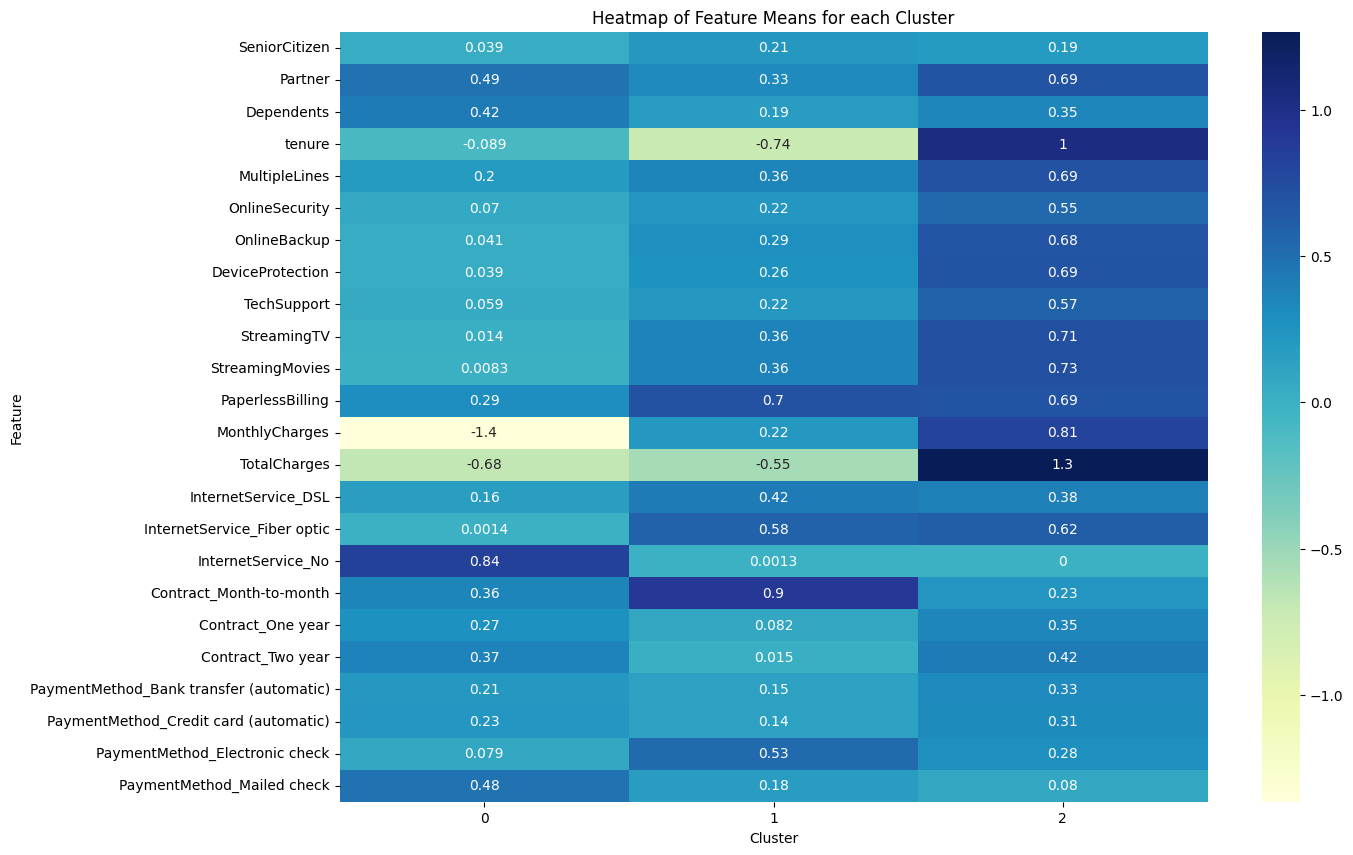

In [21]:
x_train['Cluster'] = kmeans.labels_

# Calculate the mean of the features for each cluster
cluster_feature_means = x_train.groupby('Cluster').mean()

# Plotting
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_feature_means.T, cmap='YlGnBu', annot=True)
plt.title('Heatmap of Feature Means for each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

# Remember to remove the 'Cluster' column if you want to use 'x_train' for further processing
x_train.drop('Cluster', axis=1, inplace=True)

# Using PCA

In [22]:
pca = PCA()
pca.fit(x_train)


# Calculate cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed to capture 80% variance
n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1

print(f'Number of PCA to cover at least 80 percent of data:{n_components_80}')


Number of PCA to cover at least 80 percent of data:9


In [23]:
# Amount of variance explained by choosing 9 PCA
print(f'Amount of variance explained by choosing 9 PCA:{cumulative_variance[9]}')


Amount of variance explained by choosing 9 PCA:0.8359833820621374


In [24]:
# Amount of variance explained by each PCA
print(pca.explained_variance_ratio_)

[3.84970588e-01 1.73773073e-01 6.16391628e-02 3.87407830e-02
 3.47486556e-02 3.19847170e-02 2.96390014e-02 2.84390887e-02
 2.70389475e-02 2.50093650e-02 2.20545765e-02 2.08751100e-02
 1.97368224e-02 1.83719825e-02 1.73004023e-02 1.65523360e-02
 1.50112727e-02 1.31516725e-02 1.15150877e-02 7.74926020e-03
 1.69809515e-03 2.99184516e-32 4.81702360e-33 2.47136151e-33]


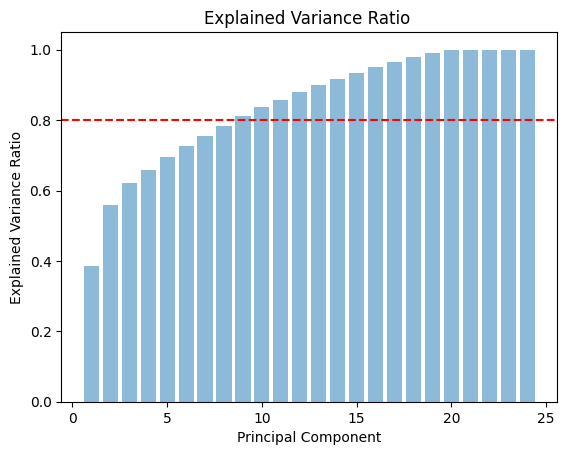

In [25]:
# plot of Total explained variance by number of PCA
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio ')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.show()


In [26]:
# Fit PCA with 9 components on training features columns and transform it into train and test feature columns
pca=PCA(n_components=9)
pca.fit(x_train)
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)

# Plot 2 PCAs

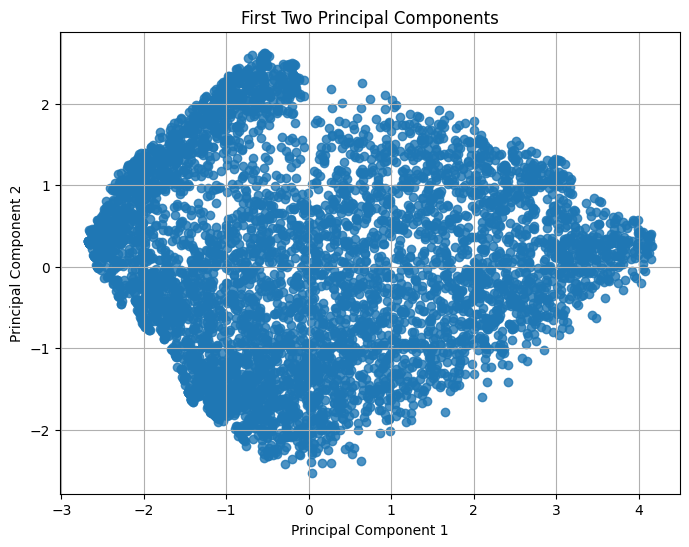

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], alpha=0.8)
plt.title('First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Plot of contribution of each feature in each PCA

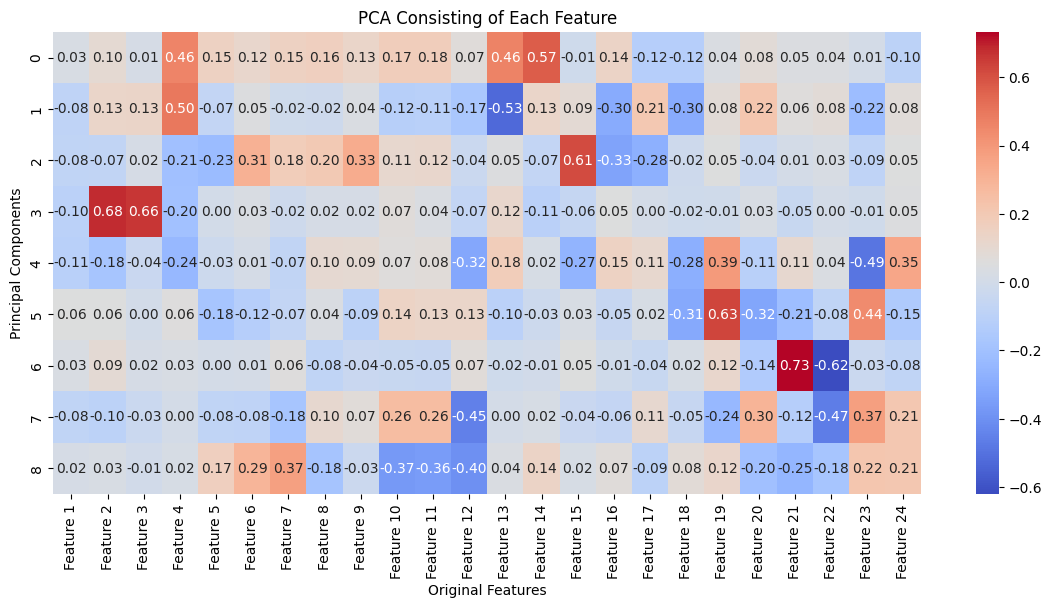

In [28]:
plt.figure(figsize=(14, 6))
components=pca.components_
sns.heatmap(components, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=[f'Feature {i+1}' for i in range(24)])
plt.title('PCA Consisting of Each Feature')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

# Clustering dataset after using PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

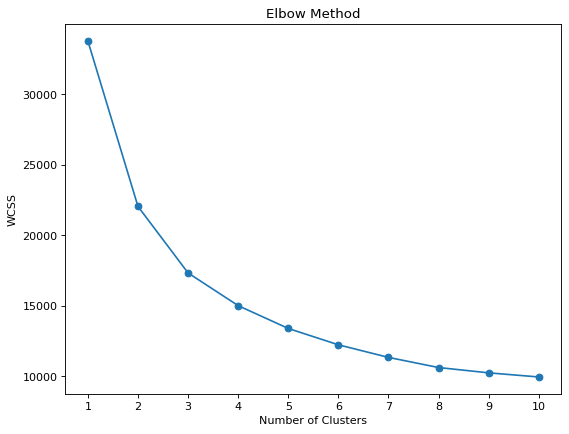

In [29]:
# Calculate within-cluster sum of squares (WCSS)
wcss_values = calculate_wcss(x_train_pca)

# Plot the elbow curve
plot_elbow_curve(wcss_values)

In [30]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss_values, curve="convex", direction="decreasing")
print(f'number of suggested clusters after using PCA:{kl.elbow}')

number of suggested clusters after using PCA:3
